# CUDA exercises

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display

In [27]:
HEADER = ["tests_done", "N", "total_time", "average_time", "max_runtime", "min_runtime"]
HEADER2 = ["grid_sizes", "block_size"] + HEADER
def csv_parse(path, header=HEADER):
    if header:
        df = pd.read_csv(path, sep=";", names=header)
    else:
        df = pd.read_csv(path, sep=";")
    #display(df.head())
    return df



# Ex2.1 a)

,N,num_tests,min_runtime,average_time,max_runtime
0,100,10,0.000156,0.085454,0.852950
1,10000,10,0.000153,0.087652,0.875062
2,1000000,10,0.000193,0.085909,0.849576
3,100000000,10,0.021196,0.168125,0.853237


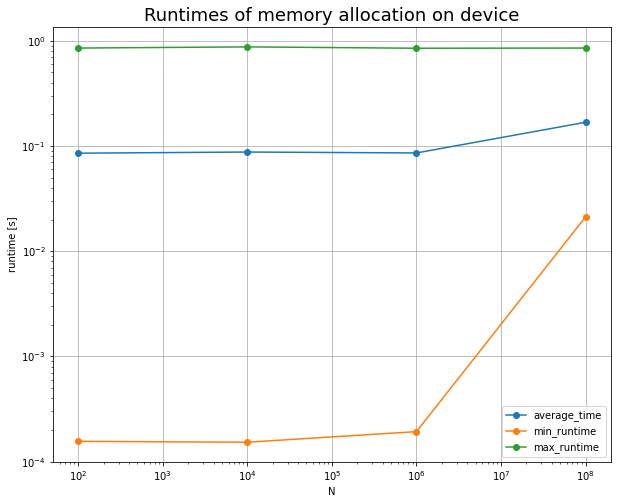

In [10]:
df = csv_parse("/Users/peterholzner/Code/many_cores/ex2/task1/out/ex2_1_a/data.csv", header=False)
display(df)

fig,ax  = plt.subplots(figsize=(10,8));
df.plot(x="N", y=["average_time", "min_runtime", "max_runtime"], ax=ax, logx=True, logy=True, marker="o");
ax.set_title("Runtimes of memory allocation on device", fontsize=18);
ax.set_ylabel("runtime [s]");
ax.grid();
fig.savefig("/Users/peterholzner/Code/many_cores/ex2/task1/out/fig_ex2_1_alloc.pdf")

# Ex2.1. b)

,tests_done,N,total_time,average_time,max_runtime,min_runtime,hosttime
0,10,256,0.043792,0.004379,0.043770,0.000002,0.000002
1,10,1024,0.036626,0.003663,0.036605,0.000002,0.000007
2,10,4096,0.050572,0.005057,0.050550,0.000002,0.000036
3,10,8192,0.026777,0.002678,0.026755,0.000002,0.000071
4,10,32768,0.000177,0.000018,0.000157,0.000002,0.024294
5,10,65536,0.000260,0.000026,0.000240,0.000002,0.000599
6,10,131072,0.000501,0.000050,0.000477,0.000002,0.001137


,tests_done,N,total_time,average_time,max_runtime,min_runtime,hosttime
0,1,256,10.5451,10.5451,10.5451,10.5451,0.000002
1,1,1024,42.1303,42.1303,42.1303,42.1303,0.000004
2,1,4096,0.0000,0.0000,0.0000,0.0000,0.000018
3,1,8192,0.0000,0.0000,0.0000,0.0000,0.000034
4,1,32768,0.0000,0.0000,0.0000,0.0000,0.000152
5,1,65536,0.0000,0.0000,0.0000,0.0000,0.000299
6,1,131072,0.0000,0.0000,0.0000,0.0000,0.000620


,tests_done,N,total_time,average_time,max_runtime,min_runtime,hosttime
0,10,256,0.000115,0.000012,0.000017,0.000010,0.000003
1,10,1024,0.000112,0.000011,0.000022,0.000009,0.000009
2,10,4096,0.000110,0.000011,0.000019,0.000005,0.000036
3,10,8192,0.000156,0.000016,0.000029,0.000010,0.000070
4,10,32768,0.000109,0.000011,0.000017,0.000008,0.000316
5,10,65536,0.000104,0.000010,0.000012,0.000008,0.000576
6,10,131072,0.000104,0.000010,0.000012,0.000009,0.001142


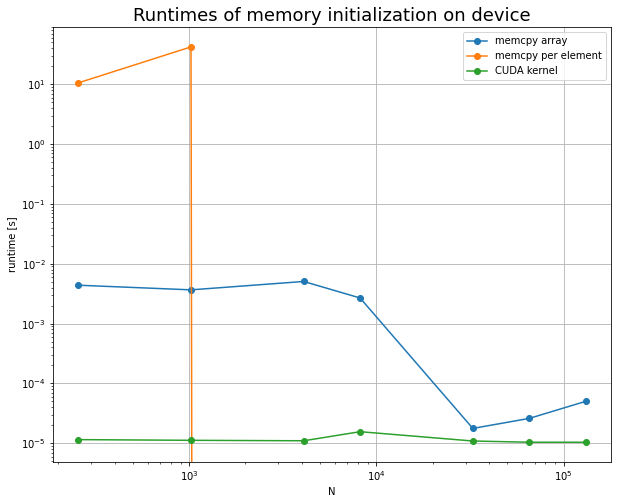

In [19]:
df1 = csv_parse("/Users/peterholzner/Code/many_cores/ex2/task1/out/ex2_1_b/opt1.csv", header=False)
display(df1)
df2 = csv_parse("/Users/peterholzner/Code/many_cores/ex2/task1/out/ex2_1_b/opt2.csv", header=False)
display(df2)
df3 = csv_parse("/Users/peterholzner/Code/many_cores/ex2/task1/out/ex2_1_b/opt3.csv", header=False)
display(df3)

fig,ax  = plt.subplots(figsize=(10,8));
df1.plot(x="N", y="average_time", ax=ax, logx=True, logy=True, marker="o");
df2.plot(x="N", y="average_time", ax=ax, logx=True, logy=True, marker="o");
df3.plot(x="N", y="average_time", ax=ax, logx=True, logy=True, marker="o");
ax.set_title("Runtimes of memory initialization on device", fontsize=18);
ax.set_ylabel("runtime [s]");
ax.legend(["memcpy array", "memcpy per element","CUDA kernel"]);
ax.grid();
fig.savefig("/Users/peterholzner/Code/many_cores/ex2/task1/out/fig_ex2_1_init.pdf")

# Ex2.1 c) + d)

,tests_done,N,total_time,average_time,max_runtime,min_runtime
0,10,128,0.237355,0.023735,0.032028,0.005847
1,10,256,0.220010,0.022001,0.032030,0.003769
2,10,1024,0.234645,0.023465,0.032023,0.003616
3,10,4096,0.257158,0.025716,0.031986,0.003659
4,10,8192,0.264024,0.026402,0.035974,0.006836
5,10,32768,0.251369,0.025137,0.032027,0.004200
6,10,65536,0.220252,0.022025,0.032479,0.003521
7,10,131072,0.234629,0.023463,0.032022,0.005495
8,10,1000000,0.288014,0.028801,0.040011,0.003056
9,10,10000000,0.239948,0.023995,0.032001,0.005317


,tests_done,N,total_time,average_time,max_runtime,min_runtime
0,10,128,0.221543,0.022154,0.032013,0.006248
1,10,256,0.219973,0.021997,0.032025,0.004195
2,10,1024,0.221781,0.022178,0.035803,0.005818
3,10,4096,0.215998,0.021600,0.032034,0.003164
4,10,8192,0.215216,0.021522,0.032001,0.002421
5,10,32768,0.257085,0.025708,0.039994,0.002852
6,10,65536,0.219969,0.021997,0.032011,0.002235
7,10,131072,0.254431,0.025443,0.036023,0.002843
8,10,1000000,0.254329,0.025433,0.032023,0.003189
9,10,10000000,0.243607,0.024361,0.035127,0.003561


,tests_done,N,total_time,average_time,max_runtime,min_runtime
0,10,128,0.228023,0.022802,0.041666,0.002333
1,10,256,0.240001,0.024000,0.033739,0.003627
2,10,1024,0.208001,0.020800,0.032001,0.007433
3,10,4096,0.181335,0.018134,0.032027,0.002249
4,10,8192,0.251161,0.025116,0.048053,0.004435
5,10,32768,0.248026,0.024803,0.032028,0.003776
6,10,65536,0.240497,0.024050,0.035998,0.003140
7,10,131072,0.211996,0.021200,0.035972,0.002343
8,10,1000000,0.239669,0.023967,0.039967,0.002426
9,10,10000000,0.251994,0.025199,0.039975,0.005886


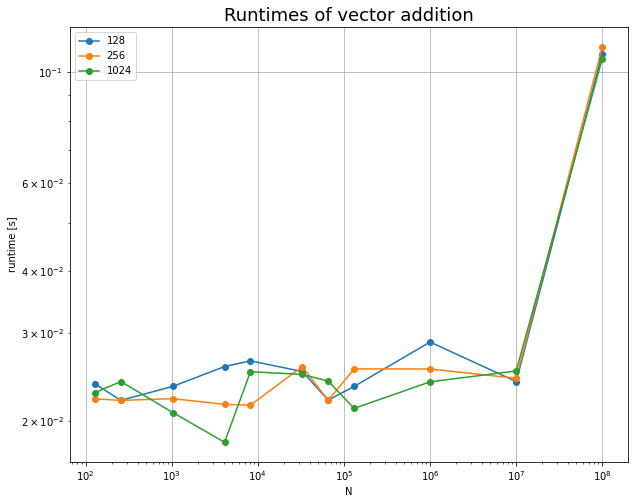

In [28]:
df1 = csv_parse("/Users/peterholzner/Code/many_cores/ex2/task1/out/ex2_1_c/data128.csv", header=HEADER)
df2 = csv_parse("/Users/peterholzner/Code/many_cores/ex2/task1/out/ex2_1_c/data.csv", header=HEADER)
df3 = csv_parse("/Users/peterholzner/Code/many_cores/ex2/task1/out/ex2_1_c/data1024.csv", header=HEADER)
display(df1)
display(df2)
display(df3)

fig,ax  = plt.subplots(figsize=(10,8));
df1.plot(x="N", y="average_time", ax=ax, logx=True, logy=True, marker="o");
df2.plot(x="N", y="average_time", ax=ax, logx=True, logy=True, marker="o");
df3.plot(x="N", y="average_time", ax=ax, logx=True, logy=True, marker="o");
ax.set_title("Runtimes of vector addition", fontsize=18);
ax.set_ylabel("runtime [s]");
ax.legend(["128", "256","1024"]);
ax.grid();
fig.savefig("/Users/peterholzner/Code/many_cores/ex2/task1/out/fig_ex2_1_vector.pdf")

# Ex2.1 e)

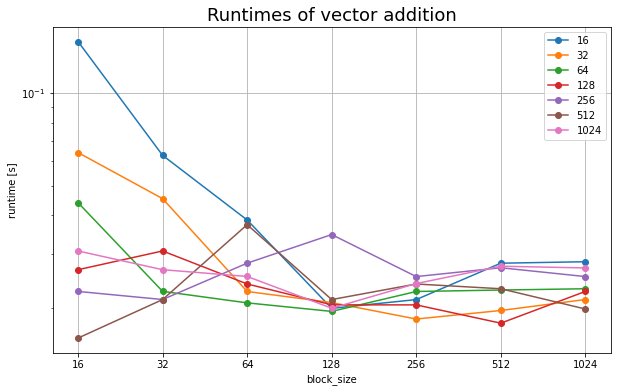

In [49]:
df = csv_parse("/Users/peterholzner/Code/many_cores/ex2/task1/out/ex2_1_e/data.csv", header=HEADER2)
#display(df)

vec = [16, 32, 64, 128, 256, 512, 1024]
fig, ax  = plt.subplots(figsize=(10,6));
for v in vec:
    df[df["grid_sizes"]==v].plot(x="block_size", y="average_time", ax=ax, marker="o", logy=True, logx=True);

ax.set_title("Runtimes of vector addition", fontsize=18);
ax.set_ylabel("runtime [s]");
ax.legend([str(v) for v in vec]);
ax.grid();
ax.set_xscale('log', basex=2)
ax.set_xticklabels([str(v) for v in [1,2]+vec])
fig.savefig("/Users/peterholzner/Code/many_cores/ex2/task1/out/fig_ex2_1_blocks.pdf")